In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load dataset, drop index, and view head
df = pd.read_csv('clean_data.csv')
df = df.drop(columns='Unnamed: 0')
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [79]:
# Assess cost per minute for each call category
df['cost_per_day_call'] = df['total_day_charge'] / df['total_day_minutes']
df['cost_per_intl_call'] = df['total_intl_charge'] / df['total_intl_minutes']
df['cost_per_night_call'] = df['total_night_charge'] / df['total_night_minutes']
df['cost_per_eve_call'] = df['total_eve_charge'] / df['total_eve_minutes']

night_call_per_min = np.mean(df['cost_per_night_call'])
eve_call_per_min = np.mean(df['cost_per_eve_call'])
intl_call_per_min = np.mean(df['cost_per_intl_call'])
day_call_per_min = np.mean(df['cost_per_day_call'])

print(f'Day Cost/Min: ${round(day_call_per_min, 2)}')
print(f'Night Cost/Min: ${round(night_call_per_min, 2)}')
print(f'Eve Cost/Min: ${round(eve_call_per_min, 2)}')
print(f'International Cost/Min: ${round(intl_call_per_min, 2)}')

Day Cost/Min: $0.17
Night Cost/Min: $0.05
Eve Cost/Min: $0.09
International Cost/Min: $0.27


Day calls are four times as much as night calls, twice as much as eve calls. 

In [80]:
# create a column for total charges across all 4 call categories (intl, day, eve, churn)
df['total_spend'] = df.total_day_charge + df.total_eve_charge + df.total_night_charge + df.total_intl_charge

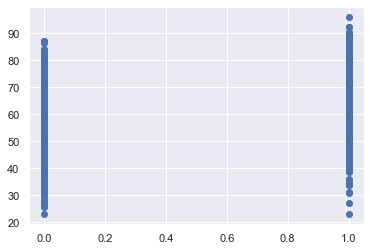

In [81]:
# scatter plot for total spend against churn
plt.scatter(x = df['churn'], y = df['total_spend'])

It does look like the people spending the most have a higher churn, but I will need a better visual to really know.

There is a normal distribution for total spend, most clients spend $50-70, and the vaues are symetrical on either side of the curve.

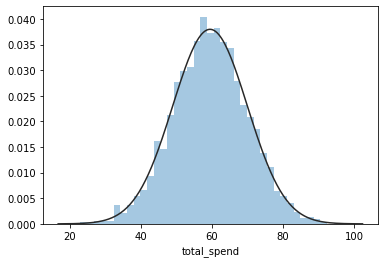

In [9]:
sns.distplot(df['total_spend'], fit=norm, kde=False)
plt.show()

In [11]:
churn_rate = round(sum(df.churn) / len(df.churn) * 100, 2)


print('Churn Rate: {0}%'.format(churn_rate))

Churn Rate: 14.49%


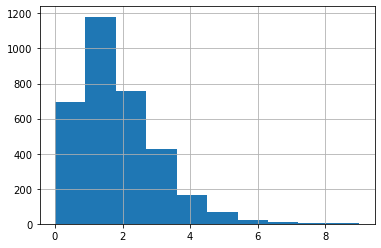

In [13]:
df['customer_service_calls'].hist()

In [14]:
df_churned = df[df.churn != False]

In [15]:
df_churned.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,...,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn,cost_per_day_call,cost_per_intl_call,cost_per_night_call,cost_per_eve_call,total_spend
10,IN,65,415,no,no,0,129.1,137,21.95,228.5,...,12.7,6,3.43,4,True,0.170023,0.270079,0.045019,0.084989,54.20
15,NY,161,415,no,no,0,332.9,67,56.59,317.8,...,5.4,9,1.46,4,True,0.169991,0.270370,0.045019,0.084991,92.29
21,CO,77,408,no,no,0,62.4,89,10.61,169.9,...,5.7,6,1.54,5,True,0.170032,0.270175,0.044990,0.084991,36.02
33,AZ,12,408,no,no,0,249.6,118,42.43,252.4,...,11.8,3,3.19,1,True,0.169992,0.270339,0.045004,0.084984,79.68
41,MD,135,408,yes,yes,41,173.1,85,29.43,203.9,...,14.6,15,3.94,0,True,0.170017,0.269863,0.045008,0.084993,56.20


In [16]:
df_churned['called_cs'] = df_churned['customer_service_calls'] >=1
df['called_cs'] = df['customer_service_calls'] >=1

display(df.head())
display(df_churned.head())

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,...,total_intl_calls,total_intl_charge,customer_service_calls,churn,cost_per_day_call,cost_per_intl_call,cost_per_night_call,cost_per_eve_call,total_spend,called_cs
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,...,3,2.70,1,False,0.170011,0.270000,0.044994,0.085005,75.56,True
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,...,3,3.70,1,False,0.169988,0.270073,0.045008,0.085013,59.24,True
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,...,5,3.29,0,False,0.170008,0.269672,0.045018,0.084983,62.29,False
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,...,7,1.78,2,False,0.170007,0.269697,0.044997,0.084976,66.80,True
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,...,3,2.73,3,False,0.170006,0.270297,0.044997,0.085030,52.09,True


,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,...,total_intl_calls,total_intl_charge,customer_service_calls,churn,cost_per_day_call,cost_per_intl_call,cost_per_night_call,cost_per_eve_call,total_spend,called_cs
10,IN,65,415,no,no,0,129.1,137,21.95,228.5,...,6,3.43,4,True,0.170023,0.270079,0.045019,0.084989,54.20,True
15,NY,161,415,no,no,0,332.9,67,56.59,317.8,...,9,1.46,4,True,0.169991,0.270370,0.045019,0.084991,92.29,True
21,CO,77,408,no,no,0,62.4,89,10.61,169.9,...,6,1.54,5,True,0.170032,0.270175,0.044990,0.084991,36.02,True
33,AZ,12,408,no,no,0,249.6,118,42.43,252.4,...,3,3.19,1,True,0.169992,0.270339,0.045004,0.084984,79.68,True
41,MD,135,408,yes,yes,41,173.1,85,29.43,203.9,...,15,3.94,0,True,0.170017,0.269863,0.045008,0.084993,56.20,False


In [17]:
sum(df_churned['called_cs'] == True) / len(df_churned['called_cs'])

0.8095238095238095

In [18]:
sum(df['called_cs'] == True) / len(df['called_cs'])

0.7908790879087909

79% of all clients have made one or more customer service calls and 81% of all churned clients made one call or more. These numbers are fairly proportionate, menaing that a single call or more to customer service is not an indicator of churn, it may be true that clients who make more calls are more likely to churn, but I will need to assess this further.

In [19]:
df_churned['customer_service_calls'].value_counts()

1    122
0     92
2     87
4     76
3     44
5     40
6     14
7      5
9      2
8      1
Name: customer_service_calls, dtype: int64

In [20]:
df['customer_service_calls'].value_counts()

1    1181
2     759
0     697
3     429
4     166
5      66
6      22
7       9
9       2
8       2
Name: customer_service_calls, dtype: int64

In [21]:
churn_by_cs_calls = []

for x in range(0,10):
    churn_by_cs_calls.append(round(sum(df_churned['customer_service_calls'] == x) / 
                             sum(df['customer_service_calls'] == x) * 100, 0))
churn_by_cs_calls

[13.0, 10.0, 11.0, 10.0, 46.0, 61.0, 64.0, 56.0, 50.0, 100.0]

In [22]:
churn_by_cs_calls_range = []

for x in range(0,10):
    churn_by_cs_calls_range.append(round(sum(df_churned['customer_service_calls'] >= x) / 
                             sum(df['customer_service_calls'] >= x) * 100, 0))
churn_by_cs_calls_range

[14.0, 15.0, 18.0, 26.0, 52.0, 61.0, 63.0, 62.0, 75.0, 100.0]

Over 50% of the clients making 5 or more customer service calls will churn. Churn really becomes an issue at the 4th call when churn jumps by nearly 5x. 

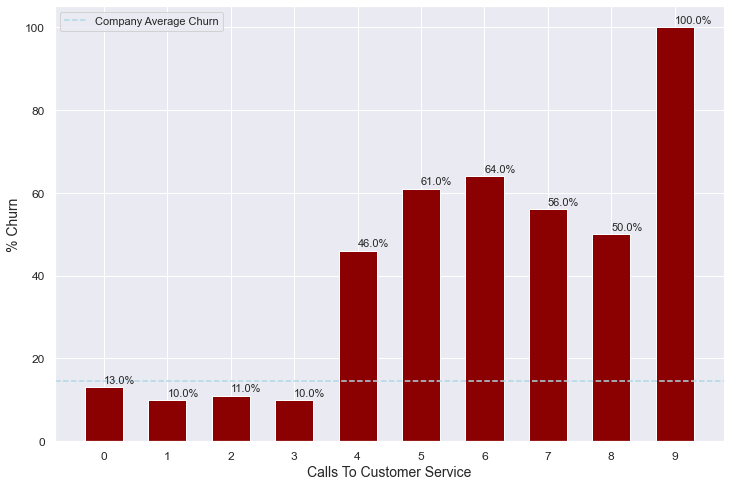

In [25]:
sns.set()
x = range(0,10)
plt.figure(figsize=(12,8))
plt.bar(x=x, height=churn_by_cs_calls,
        width = 0.6, tick_label=x, color='darkred')
for index,data in enumerate(churn_by_cs_calls):
    plt.text(x=index , 
             y =data+1 , 
             s=f"{data}%" , 
             fontdict=dict(fontsize=11))

plt.axhline(14.5, label='Company Average Churn', ls='--', color='lightblue')
plt.ylabel('% Churn', size=14)
plt.xlabel('Calls To Customer Service', size=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
fig1 = plt.gcf()
plt.show()
fig1.savefig('tessstttyyy.png', dpi=100)

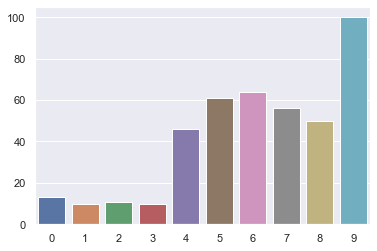

In [26]:
sns.barplot(x=[0,1,2,3,4,5,6,7,8,9], y=[13.0, 10.0, 11.0, 10.0, 46.0, 61.0, 64.0, 56.0, 50.0, 100.0])

In [27]:
sum(df_churned['customer_service_calls'] >= 7) / sum(df['customer_service_calls'] >= 7)

0.6153846153846154

In [32]:
sum(df['called_cs'] == True) / len(df['called_cs'])

0.7908790879087909

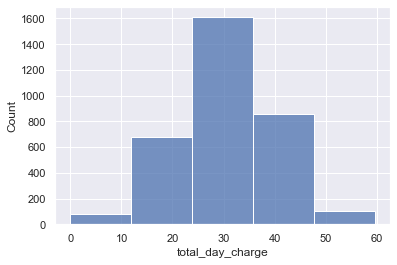

In [38]:
sns.histplot(df['total_day_charge'], bins=5)
plt.show()

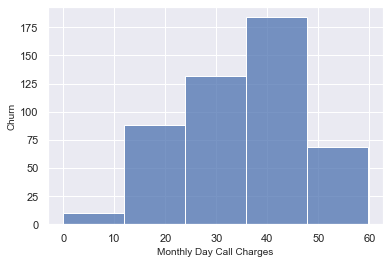

<Figure size 1080x576 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [40]:
sns.histplot(df_churned['total_day_charge'], bins=5)
plt.xlabel("Monthly Day Call Charges", size=10)
plt.ylabel("Churn", size=10)
plt.figure(figsize=(15,8))
plt.show()
plt.savefig('fo.png')

In [42]:
counts1, _ =  np.histogram(df['total_day_charge'], bins=5)

counts2, _ =  np.histogram(df_churned['total_day_charge'], bins=5)

day_churn_rate = counts2 / counts1
day_churn_rate

array([0.12345679, 0.12941176, 0.08198758, 0.21445221, 0.66346154])

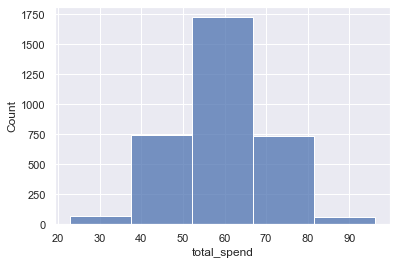

In [43]:
sns.histplot(df['total_spend'], bins=5)
plt.show()

In [45]:
counts3, _ =  np.histogram(df_churned['total_spend'], bins=5)

counts4, _ =  np.histogram(df['total_spend'], bins=5)

total_change = counts3 / counts4

total_change

array([0.11428571, 0.12398922, 0.08169177, 0.26258503, 0.81666667])

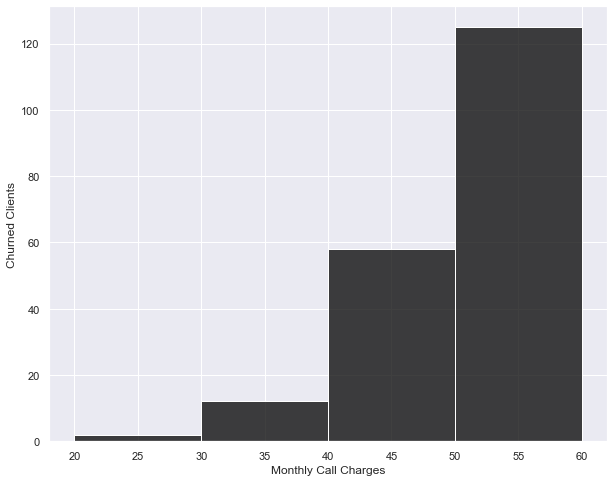

In [46]:
plt.figure(figsize=(10,8))
sns.histplot(df_churned['total_spend'], bins=[20,30, 40, 50, 60], color="black")
plt.xlabel("Monthly Call Charges", size=12)
plt.ylabel("Churned Clients", size=12)
fig3 = plt.gcf()
plt.show()
fig3.savefig('foo.png', dpi=100)

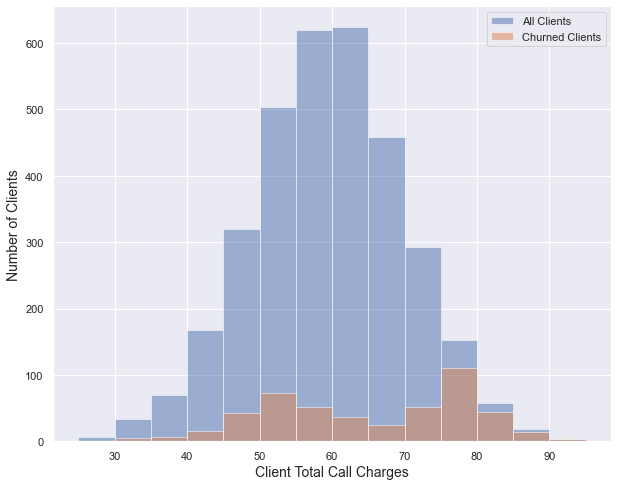

In [49]:
plt.figure(figsize=(10,8))
plt.hist(df['total_spend'], bins=range(25, 100, 5), alpha=0.5, label="All Clients")
plt.hist(df_churned['total_spend'], bins=range(25, 100, 5), alpha=0.5, label="Churned Clients")
plt.legend()
plt.xlabel('Client Total Call Charges', size=14)
plt.ylabel('Number of Clients', size=14)
fig4 = plt.gcf()
plt.show()
fig4.savefig('proportions', dpi=100)

In [53]:
counts10, _ =  np.histogram(df['total_spend'], bins=range(20, 100, 5))
counts11, _ =  np.histogram(df_churned['total_spend'], bins=range(20, 100, 5))
counts11 / counts10

array([0.5       , 0.14285714, 0.15151515, 0.1       , 0.08928571,
       0.134375  , 0.14484127, 0.08387097, 0.05769231, 0.05458515,
       0.17406143, 0.7254902 , 0.75862069, 0.77777778, 1.        ])

In [57]:
counts12, _ =  np.histogram(df['total_day_charge'], bins=range(20, 70, 5))
counts12
counts13, _ =  np.histogram(df_churned['total_day_charge'], bins=range(20,70,5))
day_change = list(counts13 / counts12)
x2 = [25,30,35, 40,45, 50, 60]
day_change

[0.11860940695296524,
 0.11499272197962154,
 0.06119402985074627,
 0.10564663023679417,
 0.23529411764705882,
 0.5460526315789473,
 0.6739130434782609,
 1.0,
 nan]

In [58]:
day_change = [11.86, 11.50, 6.12, 10.56, 23.53, 54.61, 74.14]

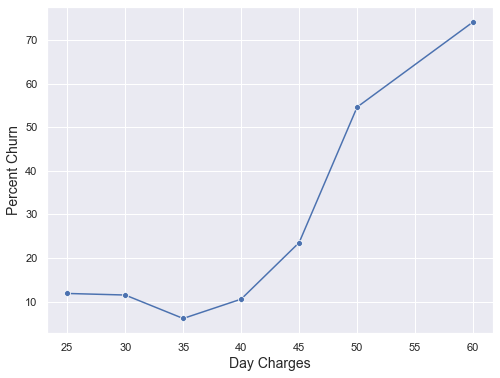

In [59]:
plt.figure(figsize=(8,6))
sns.lineplot(x=x2, y=day_change, marker="o")
plt.xlabel('Day Charges', size=14)
plt.ylabel('Percent Churn', size=14)
fig5 = plt.gcf()
plt.show()
fig5.savefig('fig5.png', dpi=100)

In [60]:
churn_by_spend_range = []

for x in range(0, 100, 5):
    churn_by_spend_range.append(round(sum(df_churned['total_spend'] >= x) / 
                             sum(df['total_spend'] >= x) * 100, 0))
churn_by_spend_range

[14.0,
 14.0,
 14.0,
 14.0,
 14.0,
 14.0,
 14.0,
 14.0,
 15.0,
 15.0,
 15.0,
 15.0,
 18.0,
 25.0,
 43.0,
 74.0,
 78.0,
 83.0,
 100.0,
 100.0]

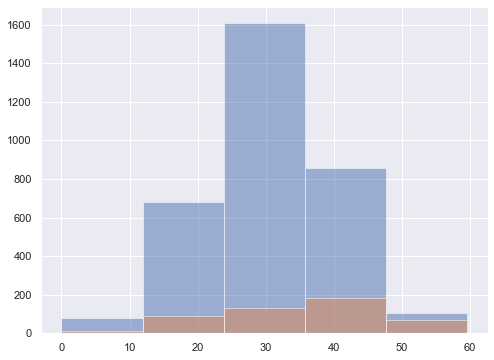

In [62]:
plt.figure(figsize=(8,6))
plt.hist(df['total_day_charge'], bins=5, alpha=0.5, label="Total Day Charges")
plt.hist(df_churned['total_day_charge'], bins=5, alpha=0.5, label="Total Churn")
plt.show()

presenting to product, operations, finance
finance how does cnaging orice affect our bottom line
product
changing pricing structure
improvement to product, day time callers have a better experience
customer service calls
3 bigeest reasons why we're struggling in churn
dirst slide bar chart how each of the featres affect churn
linear regression and churn percentage at time 3
churn rate for individual attroibute
morning callers turn at x percen higher rate than other caller, howcan we  make a better experience for these using
who is our core market? which bucket of day time do most people spend money. golden goose is in pain and we're not salving their pain
if it affects a small amount of users it doesn't hurt that much
alleviate pain

In [65]:
sum(df_churned.total_day_charge)

16989.97

In [66]:
sum(df_churned.total_spend)

31566.929999999986

In [ ]:
16989.97 / 31566.93

In [67]:
df_churned['called_cs'] = df_churned['customer_service_calls'] >=1
df['called_cs'] = df['customer_service_calls'] >=1

display(df.head())
display(df_churned.head())


,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,...,total_intl_calls,total_intl_charge,customer_service_calls,churn,cost_per_day_call,cost_per_intl_call,cost_per_night_call,cost_per_eve_call,total_spend,called_cs
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,...,3,2.70,1,False,0.170011,0.270000,0.044994,0.085005,75.56,True
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,...,3,3.70,1,False,0.169988,0.270073,0.045008,0.085013,59.24,True
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,...,5,3.29,0,False,0.170008,0.269672,0.045018,0.084983,62.29,False
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,...,7,1.78,2,False,0.170007,0.269697,0.044997,0.084976,66.80,True
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,...,3,2.73,3,False,0.170006,0.270297,0.044997,0.085030,52.09,True


,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,...,total_intl_calls,total_intl_charge,customer_service_calls,churn,cost_per_day_call,cost_per_intl_call,cost_per_night_call,cost_per_eve_call,total_spend,called_cs
10,IN,65,415,no,no,0,129.1,137,21.95,228.5,...,6,3.43,4,True,0.170023,0.270079,0.045019,0.084989,54.20,True
15,NY,161,415,no,no,0,332.9,67,56.59,317.8,...,9,1.46,4,True,0.169991,0.270370,0.045019,0.084991,92.29,True
21,CO,77,408,no,no,0,62.4,89,10.61,169.9,...,6,1.54,5,True,0.170032,0.270175,0.044990,0.084991,36.02,True
33,AZ,12,408,no,no,0,249.6,118,42.43,252.4,...,3,3.19,1,True,0.169992,0.270339,0.045004,0.084984,79.68,True
41,MD,135,408,yes,yes,41,173.1,85,29.43,203.9,...,15,3.94,0,True,0.170017,0.269863,0.045008,0.084993,56.20,False


In [76]:
top_telecom = {'Nippon': .67, 'T-Mobile': .98, 'AT&T': .69, 'Verizon': 1.03, 'SyriaTel': 14.5}

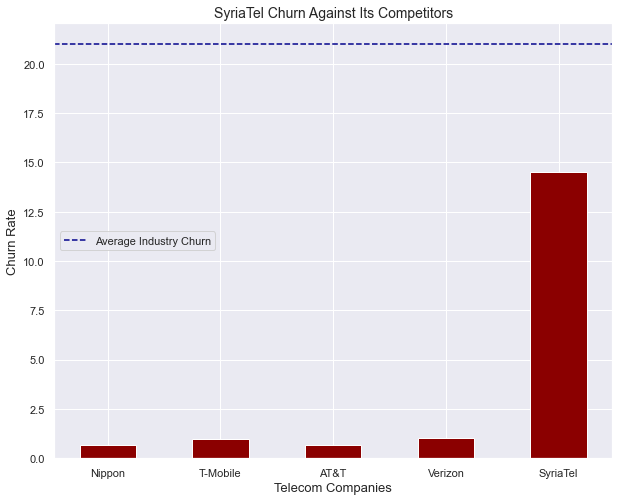

In [78]:
plt.figure(figsize=(10,8))
plt.bar(top_telecom.keys(), top_telecom.values(), width=.5, color='darkred')
plt.ylabel('Churn Rate', size=13)
plt.xlabel('Telecom Companies',  size=13)
plt.title('SyriaTel Churn Against Its Competitors', size=14)
plt.axhline(21, label='Average Industry Churn', ls='--', color='darkblue')
plt.legend()
fig7 = plt.gcf()
plt.show()
fig7.savefig('fig7', dpi=100)